In [1]:
!nvidia-smi

Mon Mar 24 01:00:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MY-API-KEY")
project = rf.workspace("visionscorer").project("basketball-lxmmu-9wy3s-mhar0")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Basketball--1 in yolov11:: 100%|██████████| 2424/2424 [00:00<00:00, 4233.55it/s]


In [1]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/Basketball--1/data.yaml epochs=20 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 121MB/s]
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Basketball--1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

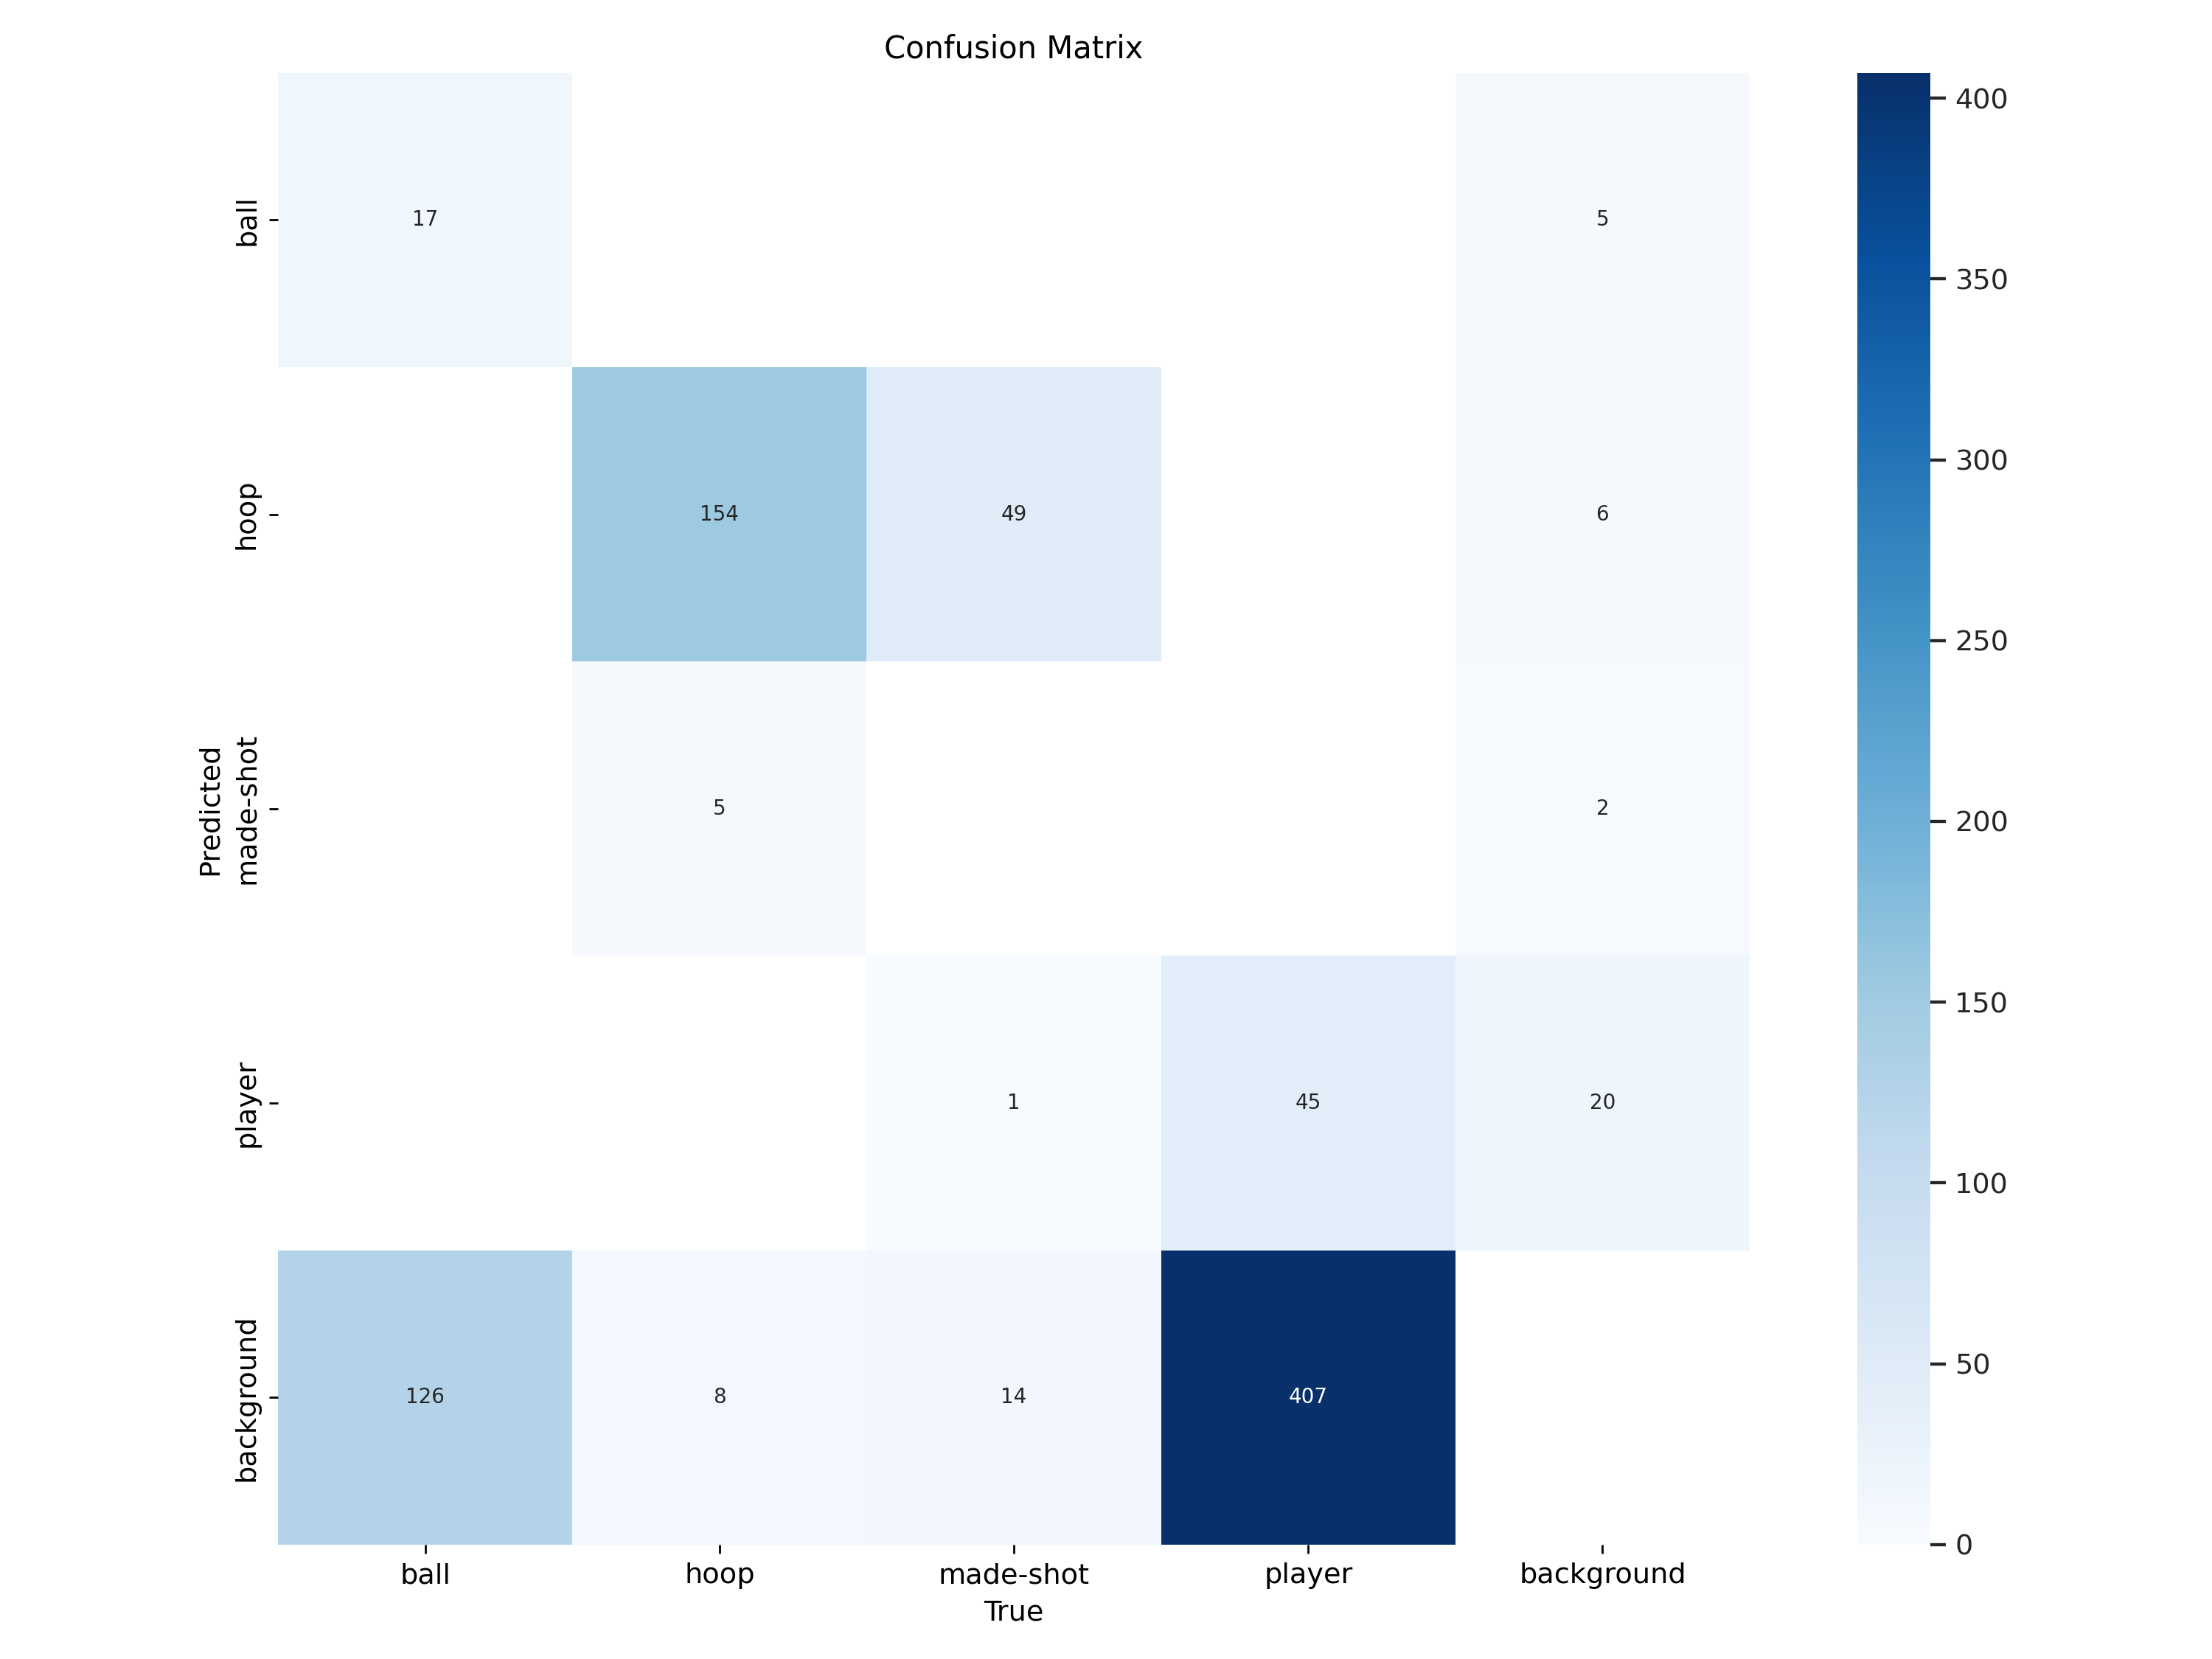

In [4]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

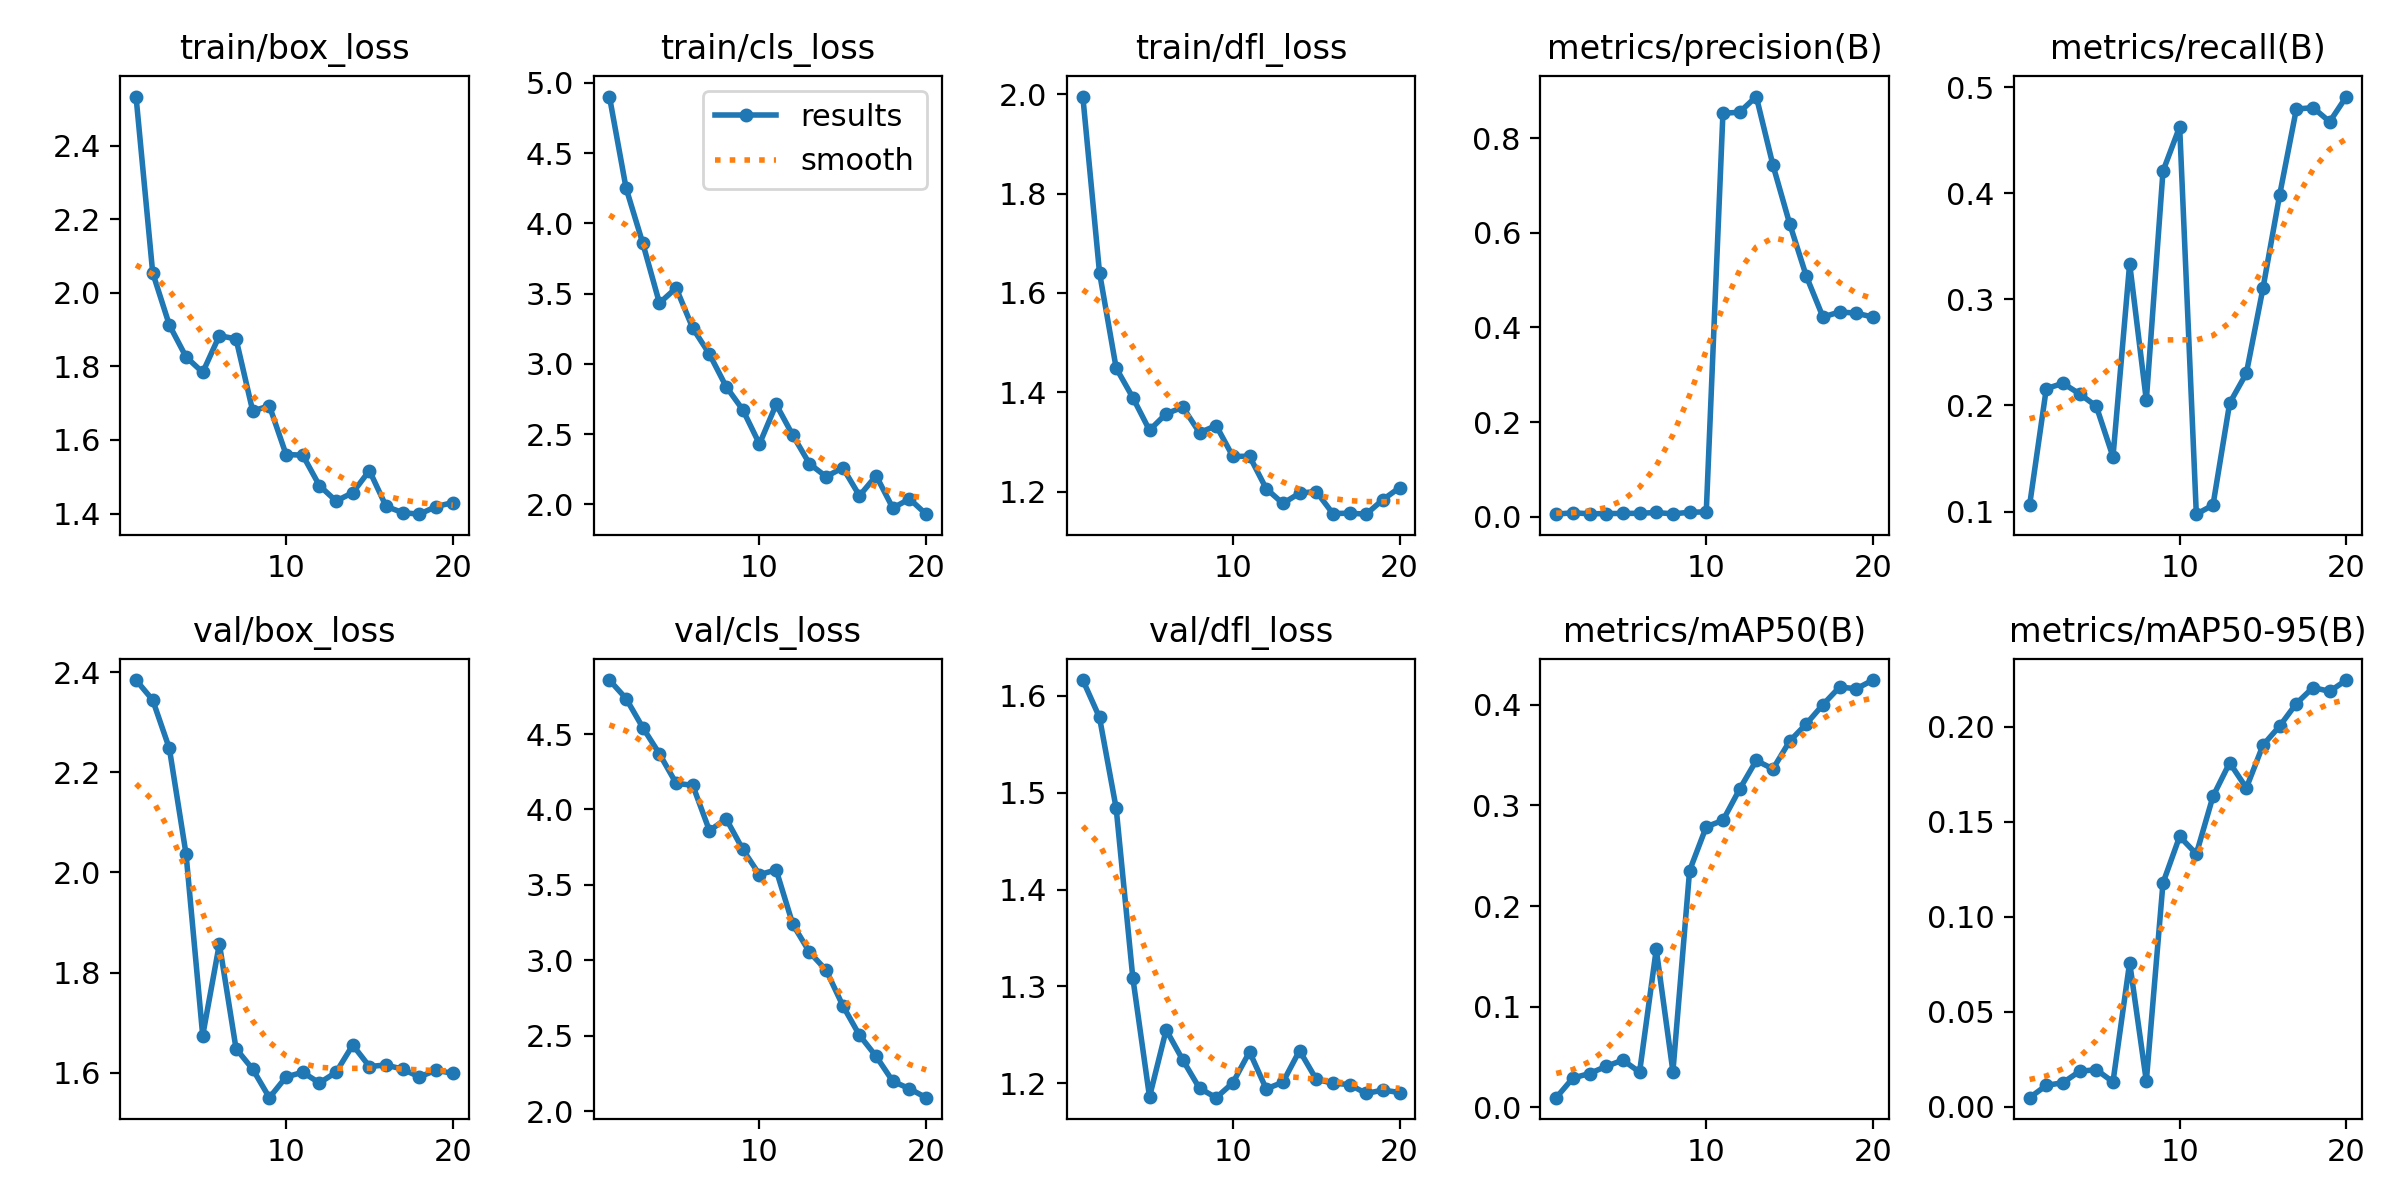

In [5]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [6]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Basketball--1/data.yaml

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Basketball--1/valid/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100% 240/240 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:04<00:00,  3.04it/s]
                   all        240        826      0.423      0.493      0.425      0.225
                  ball        143        143      0.319      0.269       0.23       0.11
                  hoop        167        167       0.64          1      0.855      0.444
             made-shot         63         64      0.184      0.391      0.237      0.124
                player         63        452       0.55      0.314      0.376      0.221
Speed: 1.3ms preprocess, 5.0ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https:

In [13]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source = /content/Basketball--1/test/images data=/Basketball--1/data.yaml

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/121 /content/Basketball--1/test/images/extracted_frame_260_video_49-mp4_png.rf.66f18e81ea1d8bd0106c2599d2458573.jpg: 640x640 1 hoop, 5 players, 11.8ms
image 2/121 /content/Basketball--1/test/images/extracted_frame_285_video_43-mp4_png.rf.0aba94c249fd4d53168daf5b04cfa25a.jpg: 640x640 (no detections), 9.2ms
image 3/121 /content/Basketball--1/test/images/extracted_frame_293_video_2-mp4_png.rf.a3d9f941dc136e16c43058539e128170.jpg: 640x640 1 player, 9.8ms
image 4/121 /content/Basketball--1/test/images/extracted_frame_300_video_39-mp4_png.rf.7272aeacc14ac6f96002a237a896a4ab.jpg: 640x640 (no detections), 8.5ms
image 5/121 /content/Basketball--1/test/images/extracted_frame_307_video_36-mp4_png.rf.a4e5a46d8d25e138f4f73ec68eaa5da2.jpg: 640x640 2 players, 8.3ms
image 6/121 /content/Basketball--1/test/images/extracted_frame_31

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict5/*.jpg'):
  display(Image(filename=image_path,height=600))
  print("\n")